In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places,geo_tools, bloomdrivers as bd, evaltools as et
import xarray as xr
import datetime as dt
%matplotlib inline

In [2]:
savedir='/data/eolson/results/MEOPAR/SS36runs/calcFiles/'
# Change 'S3' to the location of interest
loc='all'


In [3]:
# get grid corners (use 2015 and 2013 files)

<class 'netCDF4._netCDF4.Variable'>
float32 u_wind(time_counter, y, x)
    _FillValue: nan
    level: 10 m above surface
    long_name: U-Component of Wind
    standard_name: x_wind
    units: m/s
    ioos_category: wind speed and direction
unlimited dimensions: time_counter
current shape = (24, 266, 256)
filling on


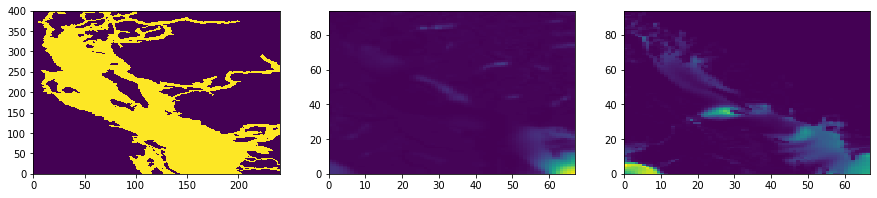

In [4]:
fig,ax=plt.subplots(1,3,figsize=(15,3))
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    ax[0].pcolormesh(mesh.variables['tmask'][0,0,400:800,110:350])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m03d01.nc') as g:
    ops_lon=g.variables['nav_lon'][:,:]
    ops_lat=g.variables['nav_lat'][:,:]
    ax[1].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    #.pcolormesh(g.variables[])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2012m03d01.nc') as g: 
    gl2_lon=g.variables['nav_lon'][:,:]
    gl2_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    print(g.variables['u_wind'])

In [5]:
ll_lon=navlon[400,110]
lr_lon=navlon[400,350]
ul_lon=navlon[800,110]
ur_lon=navlon[800,350]
ll_lat=navlat[400,110]
lr_lat=navlat[400,350]
ul_lat=navlat[800,110]
ur_lat=navlat[800,350]

In [6]:
(ll_j_ops,ll_i_ops)=geo_tools.find_closest_model_point(ll_lon,ll_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(lr_j_ops,lr_i_ops)=geo_tools.find_closest_model_point(lr_lon,lr_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ul_j_ops,ul_i_ops)=geo_tools.find_closest_model_point(ul_lon,ul_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ur_j_ops,ur_i_ops)=geo_tools.find_closest_model_point(ur_lon,ur_lat,ops_lon-360,ops_lat,grid='GEM2.5')
print((ll_j_ops,ll_i_ops),(lr_j_ops,lr_i_ops),(ul_j_ops,ul_i_ops),(ur_j_ops,ur_i_ops))

(119, 121) (134, 163) (200, 96) (213, 136)


In [7]:
(ll_j_gl2,ll_i_gl2)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(lr_j_gl2,lr_i_gl2)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl2,ul_i_gl2)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ur_j_gl2,ur_i_gl2)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
print((ll_j_gl2,ll_i_gl2),(lr_j_gl2,lr_i_gl2),(ul_j_gl2,ul_i_gl2),(ur_j_gl2,ur_i_gl2))

(117, 124) (131, 163) (193, 99) (205, 137)


In [8]:
# ops: use j: 119:213, i: 96:163
# gl2: use j: 117:205, i: 99:163

In [9]:
def getWindVars(year):
    if year>2014:
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jlims=(119,213)
        ilims=(96,163)
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(117,205)
        ilims=(99,163)
    return opsdir, nam_fmt, jlims,ilims

<ipython-input-10-bcc7bbeb2c78>:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')


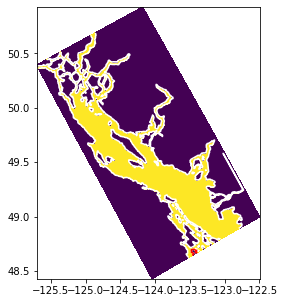

In [10]:
fig,ax=plt.subplots(1,1,figsize=(4,5))
ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')
cl=ax.contour(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],[.5],colors='w')
plt.plot(cl.allsegs[0][0][:,0],cl.allsegs[0][0][:,1],'r-')

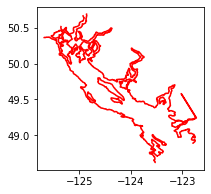

In [11]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
lens=list()
modlines=list()
for ii in range(0,len(cl.allsegs[0])):
    lens.append(len(cl.allsegs[0][ii][:,1]))
    #if np.min(cl.allsegs[0][ii][:,1])<49.2 and np.max(cl.allsegs[0][ii][:,1])>50:
    if len(cl.allsegs[0][ii][:,1])>100:
        #print(ii)
        ax.plot(cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1],'r-')
        modlines.append((cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1]))

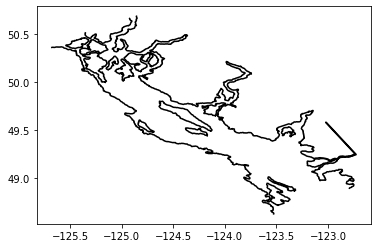

In [12]:
for (lons,lats) in modlines:
    plt.plot(lons,lats,'k-')

In [13]:
opslines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,ops_lon-360,ops_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    opslines.append((x[:,0],x[:,1]))

In [14]:
gl2lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl2_lon-360,gl2_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl2lines.append((x[:,0],x[:,1]))

In [15]:
# extract march mean wind from one of each type of file:
## ops, 2015
year=2015
opsdir, namfmt, jlims, ilims = getWindVars(year)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3ops=(fu**2+fv**2)**(3/2)
U3opsmean=np.mean(U3ops,0)

## gl2, 2013
year=2013
opsdir, namfmt, jlims, ilims = getWindVars(year)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl2=(fu**2+fv**2)**(3/2)
U3gl2mean=np.mean(U3gl2,0)

## gl0, 2009
year=2009
opsdir, namfmt, jlims, ilims = getWindVars(year)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl0=(fu**2+fv**2)**(3/2)
U3gl0mean=np.mean(U3gl0,0)

In [16]:
jS3ops,iS3ops=places.PLACES['S3']['GEM2.5 grid ji']
S3lon,S3lat=places.PLACES['S3']['lon lat']
jGLS3,iGLS3=geo_tools.find_closest_model_point(S3lon,S3lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
j39ops,i39ops=places.PLACES['QU39']['GEM2.5 grid ji']
lon39,lat39=places.PLACES['QU39']['lon lat']
jGL39,iGL39=geo_tools.find_closest_model_point(lon39,lat39,gl2_lon-360,gl2_lat,grid='GEM2.5')

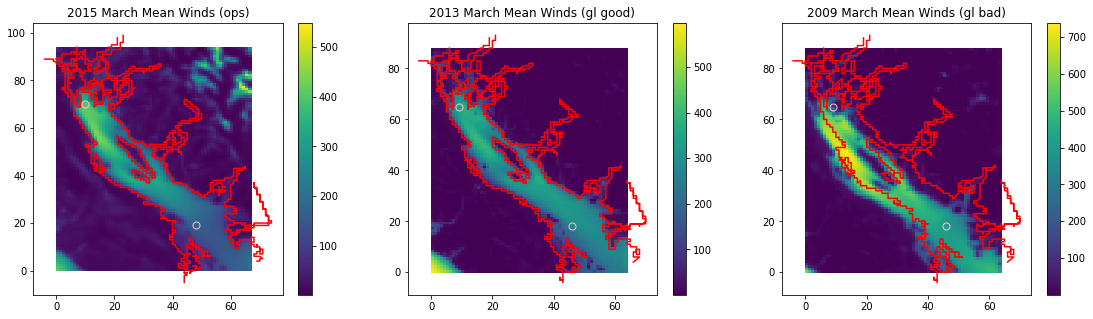

In [34]:
fig,ax=plt.subplots(1,3,figsize=(19,5))
iax=ax[0]
iax.set_title('2015 March Mean Winds (ops)')
m=iax.pcolormesh(U3opsmean)
fig.colorbar(m,ax=iax)
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')
iax.plot(iS3ops-96,jS3ops-119,'o',ms=7,fillstyle='none',mec='pink')
iax.plot(i39ops-96,j39ops-119,'o',ms=7,fillstyle='none',mec='pink')
iax=ax[1]
iax.set_title('2013 March Mean Winds (gl good)')
m=iax.pcolormesh(U3gl2mean)
fig.colorbar(m,ax=iax)
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')
iax.plot(iGLS3-99,jGLS3-117,'o',ms=7,fillstyle='none',mec='pink')
iax.plot(iGL39-99,jGL39-117,'o',ms=7,fillstyle='none',mec='pink')
iax=ax[2]
iax.set_title('2009 March Mean Winds (gl bad)')
m=iax.pcolormesh(U3gl0mean)
fig.colorbar(m,ax=iax)
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')
iax.plot(iGLS3-99,jGLS3-117,'o',ms=7,fillstyle='none',mec='pink')
iax.plot(iGL39-99,jGL39-117,'o',ms=7,fillstyle='none',mec='pink')

In [18]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

In [19]:
places.PLACES['QU39']

{'lon lat': (-125.0992, 50.0307),
 'NEMO grid ji': (736, 144),
 'GEM2.5 grid ji': (189, 106)}

In [20]:
2**3

8

In [21]:
8**3

512

In [22]:
import pickle

In [23]:
test=pickle.load(open('/ocean/aisabell/MEOPAR/extracted_files/JanToMarch_TimeSeries_2015_S3_201905.pkl','rb'))

In [24]:
test

(array([Timestamp('2015-01-01 12:30:00'), Timestamp('2015-01-02 12:30:00'),
        Timestamp('2015-01-03 12:30:00'), Timestamp('2015-01-04 12:30:00'),
        Timestamp('2015-01-05 12:30:00'), Timestamp('2015-01-06 12:30:00'),
        Timestamp('2015-01-07 12:30:00'), Timestamp('2015-01-08 12:30:00'),
        Timestamp('2015-01-09 12:30:00'), Timestamp('2015-01-10 12:30:00'),
        Timestamp('2015-01-11 12:30:00'), Timestamp('2015-01-12 12:30:00'),
        Timestamp('2015-01-13 12:30:00'), Timestamp('2015-01-14 12:30:00'),
        Timestamp('2015-01-15 12:30:00'), Timestamp('2015-01-16 12:30:00'),
        Timestamp('2015-01-17 12:30:00'), Timestamp('2015-01-18 12:30:00'),
        Timestamp('2015-01-19 12:30:00'), Timestamp('2015-01-20 12:30:00'),
        Timestamp('2015-01-21 12:30:00'), Timestamp('2015-01-22 12:30:00'),
        Timestamp('2015-01-23 12:30:00'), Timestamp('2015-01-24 12:30:00'),
        Timestamp('2015-01-25 12:30:00'), Timestamp('2015-01-26 12:30:00'),
        Time

In [25]:
(bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,
              intdiat,intphyto,spar,intmesoz,intmicroz,
            grid_time,temp,salinity,u_wind,v_wind,twind,solar,
            no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,percdiat,
            wspeed,winddirec)=test

In [26]:
u_wind

array([3.4781091, 2.6759686, 3.2417529, ..., 1.2121423, 3.64191  ,
       2.5259504], dtype=float32)

In [27]:
v_wind

array([-2.8455482, -1.208136 , -2.1149147, ..., -2.9787   ,  0.9687775,
       -1.192215 ], dtype=float32)

In [28]:
w3=np.sqrt(u_wind**2+v_wind**2)**3

In [29]:
np.mean(w3[twind>=np.datetime64(dt.datetime(2015,3,1))])

175.90845

In [30]:
twind

array(['2015-01-01T00:00:00.000000000', '2015-01-01T01:00:00.000000000',
       '2015-01-01T02:00:00.000000000', ...,
       '2015-03-31T21:00:00.000000000', '2015-03-31T22:00:00.000000000',
       '2015-03-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [31]:
twind[0]

numpy.datetime64('2015-01-01T00:00:00.000000000')

In [32]:
wspeed

array([4.4938164, 2.9360518, 3.8706365, ..., 3.215889 , 3.7685592,
       2.7931705], dtype=float32)

In [33]:
bd.D1_3monthly_avg(twind,wspeed)

(3.9082675, 4.388381, 4.4440565)